<a href="https://colab.research.google.com/github/farahqotrunnada/DTI/blob/main/Regression/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Data Science Course - Telkom Digital Talent Incubator*


---




# **Regression**
Regression analysis is a basic method used in statistical analysis of data. It’s a statistical method which allows estimating the relationships among variables. One needs to identify dependent variable which will vary based on the value of the independent variable.

## **Multiple Linear Regression**
Multiple linear regression (MLR), also known simply as multiple regression, is a statistical technique that uses several explanatory variables to predict the outcome of a response variable. Multiple regression is an extension of linear (OLS) regression that uses just one explanatory variable.

In [115]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import linear_model

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')

In [116]:
# Import Dataset
df_pie = pd.read_csv('https://raw.githubusercontent.com/farahqotrunnada/DTI/main/Regression/pie-sales.csv', sep =";")
df_pie

,week,pie_sales,price,advertising
0,1,350,5.5,3.3
1,2,460,7.5,3.3
2,3,350,8.0,3.0
3,4,430,8.0,4.5
4,5,350,6.8,3.0
5,6,380,7.5,4.0
6,7,430,4.5,3.0
7,8,470,6.4,3.7
8,9,450,7.0,3.5
9,10,490,5.0,4.0


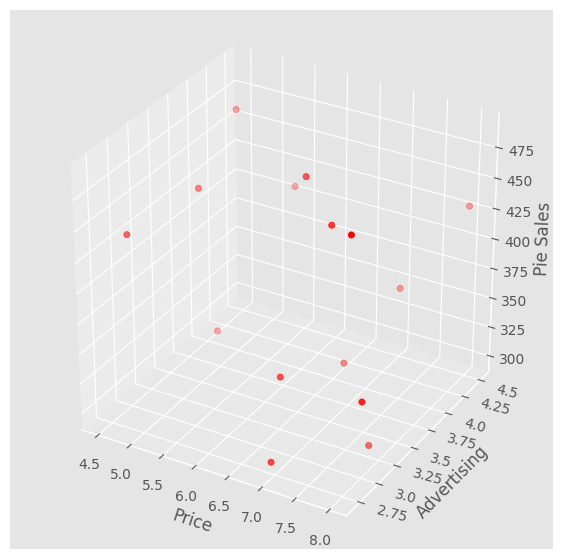

In [117]:
# Visualize the data using 3D scatterplot

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_pie['price'], df_pie['advertising'], df_pie['pie_sales'], c='r', marker='o')

ax.set_xlabel('Price')
ax.set_ylabel('Advertising')
ax.set_zlabel('Pie Sales')
ax.set_yticklabels([i/4 for i in range(10,19)], rotation=-15, va='baseline', ha='left')
plt.show()


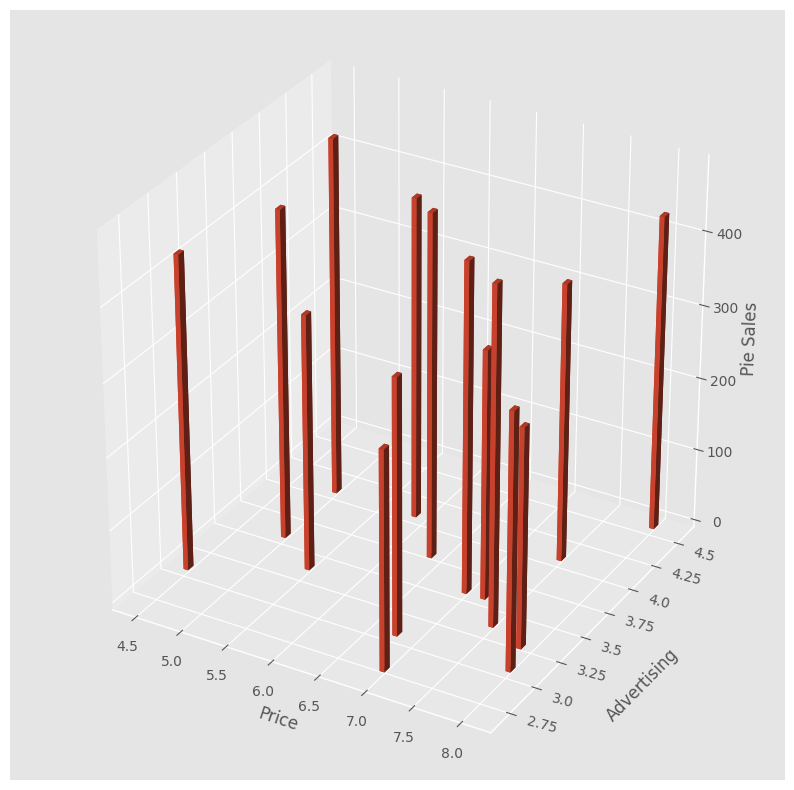

In [118]:
# Visualize the data using 3D Bar
import numpy as np
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111, projection='3d')

dx = [0.05]*15
dy = [0.05]*15
dz = df_pie['pie_sales']

ax1.set_xlabel('Price')
ax1.set_ylabel('Advertising',labelpad=15)
ax1.set_zlabel('Pie Sales')

ax1.bar3d(df_pie['price'], df_pie['advertising'],np.zeros(15), dx, dy, dz)
ax1.set_yticklabels([i/4 for i in range(10,19)], rotation=-15, va='baseline', ha='left')

plt.show()

### **Regression using Sklearn**

In [119]:
X = df_pie[['price','advertising']]
Y = df_pie['pie_sales']

In [120]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [121]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 306.5261932837436
Coefficients: 
 [-24.97508952  74.13095749]


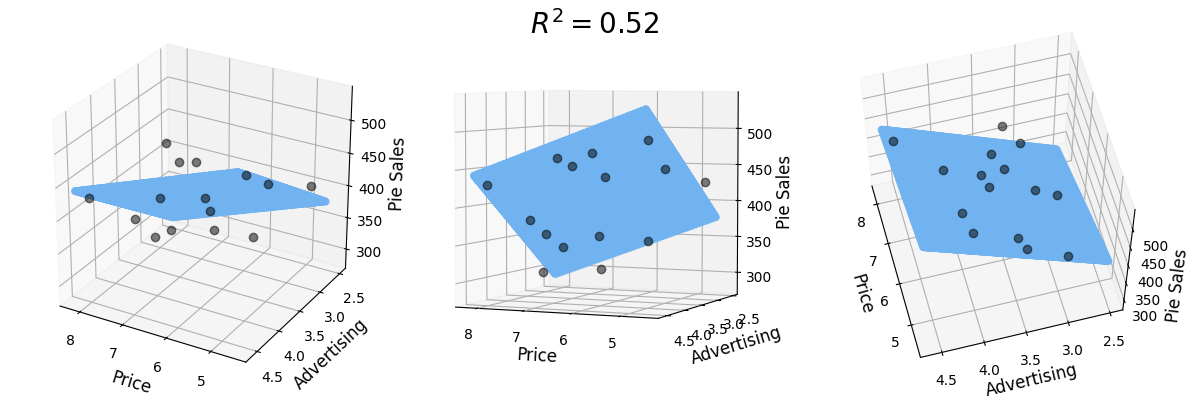

In [122]:
#Visualizing Multiple Linear Regression

X = df_pie[['price', 'advertising']].values.reshape(-1,2)
Y = df_pie['pie_sales']

######################## Prepare model data point for visualization ###############################

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(4.6, 8.2, 50)   # range of price
y_pred = np.linspace(2.5, 4.6, 500)  # range of advertising
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T
ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)


############################################## Evaluate ############################################

r2 = model.score(X, Y)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Price', fontsize=12)
    ax.set_ylabel('Advertising', fontsize=12)
    ax.set_zlabel('Pie Sales', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

In [123]:
# prediction with sklearn
new_prices = 6.1
new_advertising = 3.8 
print ('Predicted pie sales: \n', regr.predict([[new_prices,new_advertising]]))

Predicted pie sales: 
 [435.87578568]


### **Regression using Statsmodels**

In [124]:
X = sm.add_constant(X) # adding a constant

In [125]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              pie_sales   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     6.539
Date:                Fri, 23 Oct 2020   Prob (F-statistic):             0.0120
Time:                        10:08:13   Log-Likelihood:                -77.510
No. Observations:                  15   AIC:                             161.0
Df Residuals:                      12   BIC:                             163.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        306.5262    114.254      2.683      0.0